# An introduction to programming by analyzing *E. coli* populations

As an introduction to programming today, you are going to be making a slightly cleaned up example of a script I wrote for lab. This way we can go over the basics of programming with a real example so you can see that you can get useful things done with even a little programming.

You want to measure the growth rate of the bacteria *E. coli* grown in various concentrations of an antibiotic, Chloramphenicol. *E. coli* are grown in a liquid broth with antibiotic. We expect that *E. coli* populations will initially grow exponentially, but that the rate of this growth will decline as the antibiotic concentration increases.

The *E. coli* population can be measured by how much light they absorb. An automated instrument has been used to record the absorbance of *E. coli* cultures over time at various antibiotic concentrations. I've already collected the data, but you need to analyze it.

## Storing variables, performing arithmetic, and printing text

You have a spreadsheet of data created by the instrument for measuring the density of cultures of e. coli over time. This spreadsheet is "MG1655 Chloramphenicol 10 Feb averages simplified sheet.csv". This is a plain text file, but it's easier to understand when viewed in Excel or Libreoffice Calc. Please open the file now in your spreadsheet program. The top row of the file is the times at which the measurements were taken. Each row afterwards is the optical density of an e coli sample over time.

Looking at the file you'll notice a few things. There are no units recorded, so I have to tell you. The times in the top row are in seconds. *E. coli* have growth rates on the order of hours not seconds. You decide you're going to need to convert the seconds to hours.

***

#### Storing values in variables

You can save values for later and name them in python by writing code like <code> x = 3 </code>. Later in the code, x is another name for 3. Python also has basic arithmetic built-in. This includes addition, subtraction, multiplication, division, modulo, and power. You can do them like so

In [1]:
x = 3
y = .5
addition_result = x + y
subtraction_result = x - y
multiplication_result = x * y
division_result = x / y
modulo_result = x % y # the modulo operator in python is %
exponentiation_result = x**y # to take x to the power y in python you write **
print('x =', x)
print('y =', y)
print('x + y =', addition_result)
print('x - y =', subtraction_result)
print('x * y =', multiplication_result)
print('x / y =', division_result)
print('x mod y =', modulo_result)
print('x ^ y =', exponentiation_result)

x = 3
y = 0.5
x + y = 3.5
x - y = 2.5
x * y = 1.5
x / y = 6.0
x mod y = 0.0
x ^ y = 1.7320508075688772


There are a few things to explain here. 

1. Although names like "x" are acceptable for variables sometimes, *you should usually give your variables names that help you or someone else understand their purpose*.
2. The **#** sign tells Python to ignore any text starting at the # sign and until the next return. This text doesn't mean anything in Python. It's so you can embed explanations of what you are doing in your code. These are called comments. You shouldn't comment every line, but you should do it whenever something would be unclear to someone reading your code- _**especially yourself 6 months later!**_ Here I've commented the arithmetic operations where python uses symbols for them that are not the mathematical standard.
3. "print" is a Python **function**. Python functions are like mathematical functions in that they take some inputs (sometimes 0 inputs) and produce some outputs. You can write code once for a function then easily reuse it whenever you need it. The "print" function outputs text. It is extremely useful. It lets you send messages to people using your programs and helps you inspect and debug your programs.
4. The letters inside ' ' are **strings**. Strings are text. Python has many datatypes, but some of the most basic and important ones are **integers** (mathematical integers), **floats** (a finite precision approximation of real numbers), and **strings** (text). The print function will print most characters in strings as you see them in the string. The print function prints the value of variables. And you can put multiple things together with print by separating them with commas.

***

#### <span style="color:blue">Exercise 1</span>

Now using what you have learned, make a variable storing the value of the number of seconds per hour so we can use this number later to convert the time in seconds in the spreadsheet to hours. Whether or not you know or can calculate the number of seconds per hour, be selectively lazy and have python calculate its value for you from the number of seconds per minute and the number of minutes per hour. Use descriptive variable names. Then output some text stating how many seconds there are per hour; do not print just the value print words too so someone can see what unit conversion you have calculated.

In [2]:
seconds_per_minute = 60
minutes_per_hour = 60
seconds_per_hour = seconds_per_minute * minutes_per_hour
print('There are', seconds_per_hour, 'seconds per hour.')

There are 3600 seconds per hour.


***
## Python libraries and Numpy

Since you're going to be working with numerical data, you're going to want to use more tools than Python's core. An important part of coding is being able to use others' code to do various tasks so you don't have to program from scratch. But it's also important to keep code organized and not have your programs load everything and the kitchen sink when you only need one thing. Python code for a particular set of tasks is called a **module**. You can load python modules or your own files with the keyword **import**. You are now going to load the python math module **numpy**.

In order to access code from a module you must first put the module name followed by a "." then the name of what you want to access. Because programmers are lazy, we don't want to have to type "numpy" every time we want to use a numpy function. Instead we can give it a shorter alias; by convention this alias is "np". So whenver you are going to use something from numpy you'll type "np.thing". Modules may also have submodules to further organize them or in case you only want a submodule, so sometimes you'll type "module.submodule.thing".

In [3]:
import numpy as np

#### A brief intro to numpy

Numpy has a special new datatype, a numpy array. Arrays are collections of numbers arranged in lines, rectangles, cubes, etc. You can think of a 1-dimensional array as being like a vector, a 2-dimensional array as being a matrix, etc. When using a new library, you'll often need to read documentation to understand it. Numpy has a detailed user guide here https://docs.scipy.org/doc/numpy-1.13.0/user/index.html#user. If you have a specific question though, google is probably faster than searching the docs directly. Sometimes though you just want to know what a functions inputs are or what it does. Python modules and functions have documentation built-in. You can access the documentation by writing the module or function name followed by .\_\_doc\_\_ . You'll want to use the print function to output this text so it is formatted for reading.

In [4]:
print(np.__doc__)


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <http://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <http://ipython.scipy.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particu

Jupyter notebooks also have a helpful feature for discovering what's in a module. Whenver you're typing, if you hit tab, you'll see a list of suggested possible python variables, names, etc that will complete your current word. So if you are wondering if numpy has an exponential function you can type "np.exp" then hit tab. You'll get a dropdown list that contains a function called "np.exp". If you want to know more about this function then combine this with the above tip. type "print(np.exp.\_\_doc\_\_)" in a cell and see what it does.

Numpy comes with functions for specifying certain common arrays like arrays of all 0's or all 1's or a vector of integers. It also has a syntax for inputting arbitrary arrays.

In [5]:
zeros = np.zeros((3,3))
ones = np.ones((3,3))
one_to_three = np.arange(1,4) #this array will start at 1 and stop at the integer before 4
array_1d = np.array([2, 8, 6])
array_2d = np.array([[3.3, -7, 1],
                     [2.1, 45, 3],
                     [0.9, 23, 1]]) 
print('zeros is')
print(zeros)
print('ones is')
print(ones)
print('one_to_three is', one_to_three)
print('array_1d is', array_1d)
print('array_2d is')
print(array_2d)

zeros is
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
ones is
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
one_to_three is [1 2 3]
array_1d is [2 8 6]
array_2d is
[[  3.3  -7.    1. ]
 [  2.1  45.    3. ]
 [  0.9  23.    1. ]]


Numpy arrays can be added, subtracted, multiplied, etc. with the regular python operators. This works elementwise. So don't use the multiplication sign * if you want to do matrix multiplication with 2-dimensional numpy arrays.

In [6]:
print('array_1d + one_to_three =', array_1d + one_to_three)
print('array_1d * one_three', array_1d * one_to_three)
print('2 times array_1d is', 2 * array_1d)

array_1d + one_to_three = [ 3 10  9]
array_1d * one_three [ 2 16 18]
2 times array_1d is [ 4 16 12]


You can pick single elements from a numpy array and take subsets (called "slices") of numpy arrays. Numpy arrays are indexed *starting from 0*. You can take subsets of them by putting [] after the array and putting in the index you want to start from then a colon then *one index after* you want to stop. This is a little bit strange and may take some getting used to. The first index is included in the slice, but the very last index is not. If a numpy array has multiple dimensions, then the indexes for each dimension are separated by a comma. It's similar to matrix notation except indexing starts from 0 instead of 1. If you want to grab all of a dimension just put a colon with no numbers. This is all a bit arbitrary so maybe some examples will help. Study them carefully!

In [7]:
print('The first element of array_1d is', array_1d[0])
print('The upper left of array_2d is')
print(array_2d[0:2,0:2])
print('The lower right of array_2d is')
print(array_2d[1:3,1:3])
print('The first column of array_2d is', array_2d[:,0])
print('The last row of array_2d is', array_2d[2,:])

The first element of array_1d is 2
The upper left of array_2d is
[[  3.3  -7. ]
 [  2.1  45. ]]
The lower right of array_2d is
[[ 45.   3.]
 [ 23.   1.]]
The first column of array_2d is [ 3.3  2.1  0.9]
The last row of array_2d is [  0.9  23.    1. ]


Numpy also comes with function from loading data from a textfile into a numpy array. Let's finally load the data from the spreadsheet into python.

In [8]:
data = np.loadtxt(fname='MG1655 Chloramphenicol 10 Feb averages simplified sheet.csv', delimiter=',')

***
#### <span style="color:blue">Exercise 2</span>

The top row of the spreadsheet (and thus the numpy array data) is the times in seconds the measurements were taken at. Take the top row of the data and make a new variable called "time" which is that row but with the times in hours instead of seconds (remember exercise 1?). Look at "time". How long did the experiment last? How often were measurements taken?

In [9]:
time = data[0,:]/seconds_per_hour
print(time)

[  0.           0.21972222   0.43944444   0.65916667   0.87888889
   1.09861111   1.31833333   1.53805556   1.75777778   1.9775       2.19722222
   2.41694444   2.63666667   2.85666667   3.07638889   3.29611111
   3.51583333   3.73555556   3.95527778   4.175        4.39472222
   4.61444444   4.83416667   5.05388889   5.27361111   5.49333333
   5.71305556   5.93277778   6.1525       6.37222222   6.59194444
   6.81166667   7.03138889   7.25111111   7.47083333   7.69055556
   7.91027778   8.13         8.34972222   8.56944444   8.78916667
   9.00888889   9.22861111   9.44833333   9.66805556   9.88777778  10.1075
  10.32722222  10.54694444  10.76666667  10.98638889  11.20611111
  11.42583333  11.64555556  11.86527778  12.085       12.30472222
  12.52444444  12.74416667  12.96388889  13.18388889  13.40361111
  13.62333333  13.84305556  14.06277778  14.2825      14.50222222
  14.72194444  14.94166667  15.16138889  15.38111111  15.60083333
  15.82055556  16.04027778  16.26        16.47972222  

***
## Plotting data and loops

Next take another row of data and set it equal to a new variable we'll call "example_growth_curve".

In [10]:
example_growth_curve = data[1,:]

Let's plot this data. To do this, we're going to import another python library and tell the jupyter notebook to place plots in the notebook (that's the line with the %)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is the most common python plotting library. For simple 2-dimensional plots, you usually only need part the pyplot subset of the whole library. By convention, "matplotlib.pyplot" is imported with the alias "plt". The syntax for plotting y as a function of x simply <code>plt.plot(x,y)</code>. You should plot a row of the absorbance data vs time. I've added a couple lines after to add labels to the axis.

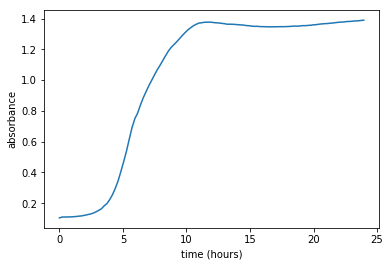

In [12]:
plt.plot(time,example_growth_curve); #semicolons suppress some text output that we don't want, feel free to remove to see text
plt.xlabel('time (hours)');
plt.ylabel('absorbance');

This plot looks fine, but ideally we'd like to look at plots of all our data. We could make 24 different cells and copy paste our code over and over changing the index of the row we want to plot as the y data, but that's a pain and makes it hard to view the data next to each other. Pyplot does allow for plotting multiple plots next to each other like as follows, but I've only done it for 4 plots below to show you what it would look like. It would be really ugly to do for 24 subplots.

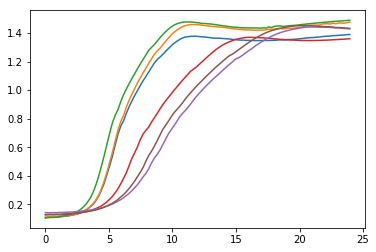

In [13]:
plt.plot(time,data[1,:]);
plt.plot(time,data[2,:]);
plt.plot(time,data[3,:]);
plt.plot(time,data[4,:]);
plt.plot(time,data[5,:]);
plt.plot(time,data[6,:]);

Fortunately, having to repetitively apply the same operation over and over is a common problem in programming. To help with this, Python has a construct called a <code>for</code> loop. For some collection of items, a for loop will perform the same task for each item in the collection. The syntax of a for loop is to first write

<code>for items in collection:</code>

where items can be any word you like that isn't already a Python keyword and collection is a python variable (that is in some sense a collection of things), then on the next line indent by four spaces and tell python what you want it to do for each item in the collection. For example, if you wanted to print the numbers 0 through 9 you could type

In [14]:
for i in [0,1,2,3,4,5,6,7,8,9]:
    print(i, end='')

0123456789

The brackets around the numbers above make a list. A list is just a list of other python stuff, a list can be filled with any arbitrary combination of stuff. Generating a list by manually typing in its contents can take a while though.

In fact, looping through integers is so common it has its own function

In [15]:
for i in range(0,10):
    print(i, end='')

0123456789

Notice that it works the same way as numpy arrays. 0 is included in the loop but 10 is not. The loop stops right before 10.

***
#### <span style="color:blue">Exercise 3</span>

Use a for loop to plot all your rows of data next to each other. You'll want to start with a line like in the above plots which sets up the figure and the axes for plotting. The axes are indexed like a numpy array in that they start from 0 and are accessed by putting [row, column] after the axes variable.

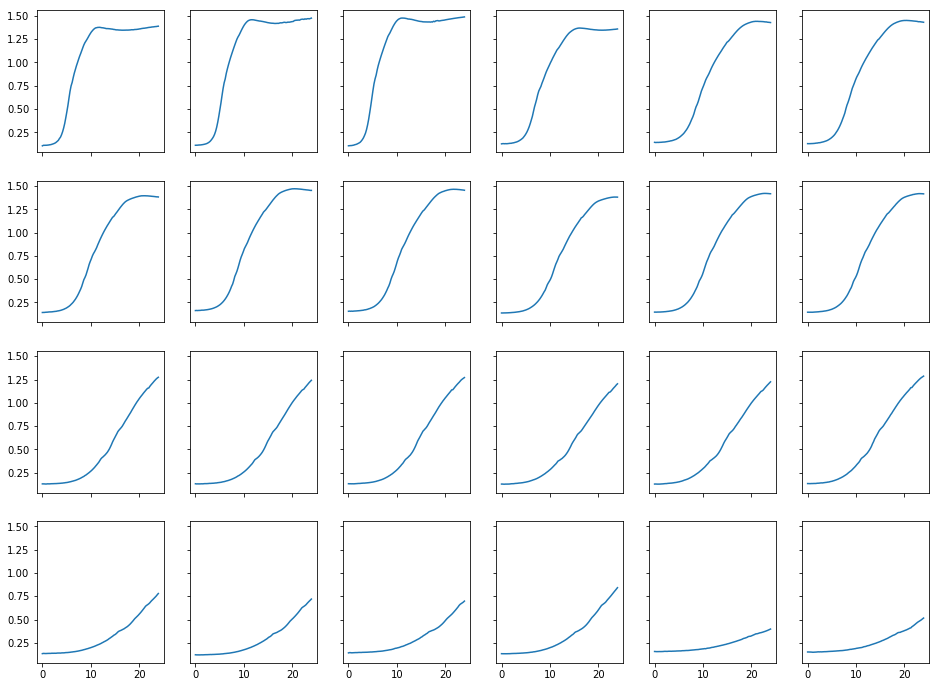

In [16]:
figure, axes = plt.subplots(4, 6, figsize=(16,12), sharex=True, sharey=True)
for i in range(24):
    row = i // 6
    column = i % 6
    axes[row,column].plot(time,data[i+1,:])

***

In [17]:
def subtractBaseline(array):
    return array - .99*np.min(array)

def windowedLineFit(x,y,start,stop):
    m, b = np.polyfit(x[start:stop],y[start:stop],1)
    return m, b